<a href="https://colab.research.google.com/github/IbukiiM/DSMA-Final-Project-2021/blob/main/LatestFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#import datset from https://data.world/alexfilatov/2016-usa-presidential-election-tweets
df = pd.read_csv('/content/drive/MyDrive/Data and Social Media Analysis/2016_US_election_tweets_100k.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100000 non-null  int64  
 1   candidate_id         100000 non-null  int64  
 2   tweet_id             100000 non-null  int64  
 3   polarity             100000 non-null  float64
 4   subjectivity         100000 non-null  float64
 5   retweet_count        100000 non-null  int64  
 6   favorite_count       100000 non-null  int64  
 7   device               100000 non-null  int64  
 8   retweeted_status_id  44607 non-null   float64
 9   lang                 91451 non-null   object 
 10  state                3279 non-null    object 
 11  tweet_text           55393 non-null   object 
 12  created_at           100000 non-null  object 
 13  inserted_at          100000 non-null  object 
 14  updated_at           100000 non-null  object 
 15  tw_user_id        

In [ ]:
df.head()

,id,candidate_id,tweet_id,polarity,subjectivity,retweet_count,favorite_count,device,retweeted_status_id,lang,state,tweet_text,created_at,inserted_at,updated_at,tw_user_id,latitude,longitude
0,57486,3,770728672433143808,0.000000,0.000000,0,0,1,NaN,tr,NaN,"Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...",2016-08-30 21:03:29,2016-08-30 21:03:29,2016-08-30 21:03:29,NaN,NaN,NaN
1,57536,3,770729424207618048,0.000000,0.000000,0,0,1,NaN,en,NaN,@BarackObama the way you showed up in Louisian...,2016-08-30 21:06:28,2016-08-30 21:06:29,2016-08-30 21:06:29,NaN,NaN,NaN
2,57586,3,770730086978977796,-0.472222,0.555556,0,0,1,NaN,en,NaN,White house not taking tax avoid seriously! Ap...,2016-08-30 21:09:06,2016-08-30 21:09:07,2016-08-30 21:09:07,NaN,NaN,NaN
3,57632,2,770748036972773376,0.000000,0.000000,0,0,0,NaN,en,NaN,"politico: .realDonaldTrump, HillaryClinton ple...",2016-08-30 22:20:26,2016-08-30 22:20:26,2016-08-30 22:20:26,NaN,NaN,NaN
4,57682,1,770748065531723778,-0.125000,0.375000,0,0,5,NaN,en,NaN,She's over due by 250 days. https://t.co/IfOO9...,2016-08-30 22:20:33,2016-08-30 22:20:33,2016-08-30 22:20:33,NaN,NaN,NaN


In [ ]:
#dropo columns with no value at all
df = df.drop(['tweet_id','latitude', 'longitude'], axis = 1)

In [ ]:
#check what type of languages it includes.
df["lang"].unique()

array(['tr', 'en', nan, 'pt', 'et', 'es', 'fr', 'ja', 'ar', 'ht', 'cs',
       'tl', 'sv', 'nl', 'ru', 'fa', 'da', 'de', 'it', 'no', 'in', 'gu',
       'hi', 'pl', 'ro', 'cy', 'lv', 'ko', 'eu', 'lt', 'fi', 'hu', 'zh',
       'vi', 'is', 'el', 'th', 'iw', 'uk', 'hy'], dtype=object)

In [ ]:
#chech what type of state it includes.
df["state"].unique()

array([nan, 'OH', 'AZ', 'MO', 'Wa', 'TN', 'CA', 'ID', 'MA', 'LA', 'IN',
       'WA', 'NH', 'MD', 'OK', 'Ph', 'FL', 'MS', 'NY', 'On', 'PA', 'TX',
       'NV', 'Vi', 'ME', 'NC', 'Br', 'En', 'KS', 'IL', 'AL', 'VA', 'CT',
       'MN', 'Su', 'NJ', 'CO', 'GA', 'Al', 'Lo', 'DC', 'KY', 'HI', 'No',
       'WI', 'OR', 'Ne', 'Ma', 'MI', 'Co', 'Pu', 'Pr', 'IA', 'Qu', 'SC',
       'Sp', 'WY', 'NM', 'So', 'In', 'Ho', 'Di', 'MT', 'La', 'Fr', 'Ke',
       'NE', 'Ch', 'Ni', 'AR', 'Au', 'WV', 'Th', 'Sc', 'Ge', 'AK', 'SD',
       'DE', 'UT', 'Un', 'Ve', 'Re', 'ND', 'Ta', 'RI', 'Po', 'VT', 'Ki',
       'Gu', 'Be', 'Ba', 'Si', 'Sv', 'GU', 'To', 'Es', 'Ja', 'Ec', 'De',
       'Gh', 'Sw', 'Ir', 'Ca', 'Hi', 'He', 'Nu', 'US', 'Mi', 'Ar', 'Os'],
      dtype=object)

In [ ]:
#replace langage names with numbers
langs = dict(enumerate(df["lang"].unique()))
langs = {v: k for k, v in langs.items()}
print(langs)
df = df.replace({"lang": langs})

{'tr': 0, 'en': 1, nan: 2, 'pt': 3, 'et': 4, 'es': 5, 'fr': 6, 'ja': 7, 'ar': 8, 'ht': 9, 'cs': 10, 'tl': 11, 'sv': 12, 'nl': 13, 'ru': 14, 'fa': 15, 'da': 16, 'de': 17, 'it': 18, 'no': 19, 'in': 20, 'gu': 21, 'hi': 22, 'pl': 23, 'ro': 24, 'cy': 25, 'lv': 26, 'ko': 27, 'eu': 28, 'lt': 29, 'fi': 30, 'hu': 31, 'zh': 32, 'vi': 33, 'is': 34, 'el': 35, 'th': 36, 'iw': 37, 'uk': 38, 'hy': 39}


In [ ]:
#replace state names with numbers
states = dict(enumerate(df["state"].unique()))
states = {v: k for k, v in states.items()}
print(states)
df = df.replace({"state": states})

{nan: 0, 'OH': 1, 'AZ': 2, 'MO': 3, 'Wa': 4, 'TN': 5, 'CA': 6, 'ID': 7, 'MA': 8, 'LA': 9, 'IN': 10, 'WA': 11, 'NH': 12, 'MD': 13, 'OK': 14, 'Ph': 15, 'FL': 16, 'MS': 17, 'NY': 18, 'On': 19, 'PA': 20, 'TX': 21, 'NV': 22, 'Vi': 23, 'ME': 24, 'NC': 25, 'Br': 26, 'En': 27, 'KS': 28, 'IL': 29, 'AL': 30, 'VA': 31, 'CT': 32, 'MN': 33, 'Su': 34, 'NJ': 35, 'CO': 36, 'GA': 37, 'Al': 38, 'Lo': 39, 'DC': 40, 'KY': 41, 'HI': 42, 'No': 43, 'WI': 44, 'OR': 45, 'Ne': 46, 'Ma': 47, 'MI': 48, 'Co': 49, 'Pu': 50, 'Pr': 51, 'IA': 52, 'Qu': 53, 'SC': 54, 'Sp': 55, 'WY': 56, 'NM': 57, 'So': 58, 'In': 59, 'Ho': 60, 'Di': 61, 'MT': 62, 'La': 63, 'Fr': 64, 'Ke': 65, 'NE': 66, 'Ch': 67, 'Ni': 68, 'AR': 69, 'Au': 70, 'WV': 71, 'Th': 72, 'Sc': 73, 'Ge': 74, 'AK': 75, 'SD': 76, 'DE': 77, 'UT': 78, 'Un': 79, 'Ve': 80, 'Re': 81, 'ND': 82, 'Ta': 83, 'RI': 84, 'Po': 85, 'VT': 86, 'Ki': 87, 'Gu': 88, 'Be': 89, 'Ba': 90, 'Si': 91, 'Sv': 92, 'GU': 93, 'To': 94, 'Es': 95, 'Ja': 96, 'Ec': 97, 'De': 98, 'Gh': 99, 'Sw': 100,

In [ ]:
#import state code file from https://worldpopulationreview.com/states/state-abbreviations
us_state_df = pd.read_csv('/content/drive/MyDrive/Data and Social Media Analysis/csvData.csv')
us_state_df.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [ ]:
state_list = us_state_df["Code"].tolist()
us_states = {x: states[x] for x in state_list}
print(us_states)

{'AL': 30, 'AK': 75, 'AZ': 2, 'AR': 69, 'CA': 6, 'CO': 36, 'CT': 32, 'DE': 77, 'DC': 40, 'FL': 16, 'GA': 37, 'HI': 42, 'ID': 7, 'IL': 29, 'IN': 10, 'IA': 52, 'KS': 28, 'KY': 41, 'LA': 9, 'ME': 24, 'MD': 13, 'MA': 8, 'MI': 48, 'MN': 33, 'MS': 17, 'MO': 3, 'MT': 62, 'NE': 66, 'NV': 22, 'NH': 12, 'NJ': 35, 'NM': 57, 'NY': 18, 'NC': 25, 'ND': 82, 'OH': 1, 'OK': 14, 'OR': 45, 'PA': 20, 'RI': 84, 'SC': 54, 'SD': 76, 'TN': 5, 'TX': 21, 'UT': 78, 'VT': 86, 'VA': 31, 'WA': 11, 'WV': 71, 'WI': 44, 'WY': 56}


In [ ]:
#create new column for us state
df.insert(12, 'us_state', 0)

In [ ]:
df["us_state"] = df['state']
for i in range(len(df['us_state'])):
  if df['us_state'].iloc[i] not in us_states.values():
    df['us_state'].iloc[i] = 0
df.us_state.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       20, 21, 22, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42,
       44, 45, 48, 52, 54, 56, 57, 62, 66, 69, 71, 75, 76, 77, 78, 82, 84,
       86])

In [ ]:
df.retweet_count.unique()

array([0])

In [ ]:
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

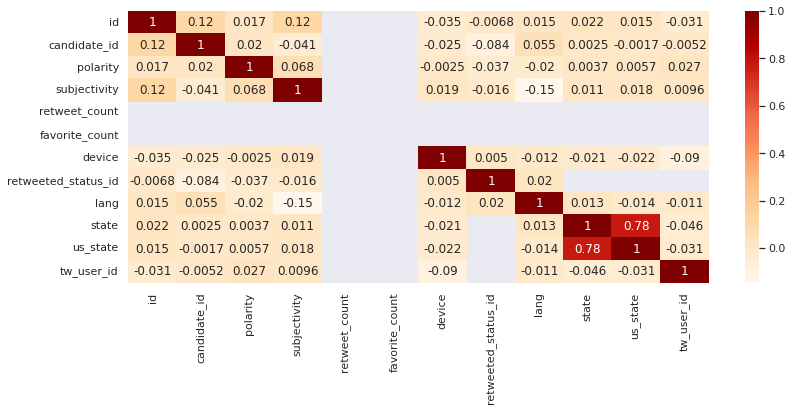

In [ ]:
plt.figure(figsize=(13,5))
cm = df.corr()
sns.heatmap(cm,cmap="OrRd",annot=True)

In [ ]:
#distribute polarity values into, negative, neutral, and positive
df.insert(4, 'pol_group', 0)
for i in range(len(df)):
  if df.loc[i,"polarity"] < 0:
    df.loc[i,"pol_group"] = -1
  if df.loc[i,"polarity"] == 0:
    df.loc[i,"pol_group"] = 0
  if df.loc[i,"polarity"] > 0:
    df.loc[i,"pol_group"] = 1

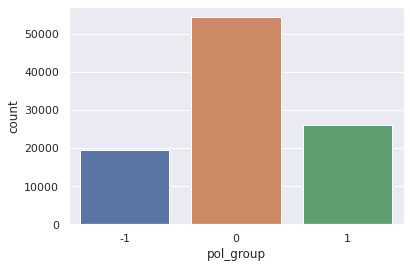

In [ ]:
sns.countplot(data = df , x = 'pol_group')

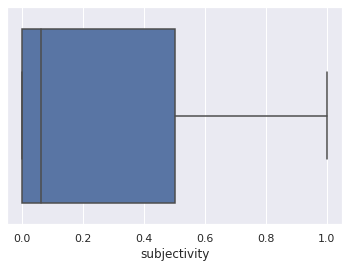

In [ ]:
sns.boxplot(data=df, x="subjectivity")

In [ ]:
df.head()

,id,candidate_id,polarity,subjectivity,pol_group,retweet_count,favorite_count,device,retweeted_status_id,lang,state,tweet_text,created_at,us_state,inserted_at,updated_at,tw_user_id
0,57486,3,0.000000,0.000000,0,0,0,1,NaN,0,0,"Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...",2016-08-30 21:03:29,0,2016-08-30 21:03:29,2016-08-30 21:03:29,NaN
1,57536,3,0.000000,0.000000,0,0,0,1,NaN,1,0,@BarackObama the way you showed up in Louisian...,2016-08-30 21:06:28,0,2016-08-30 21:06:29,2016-08-30 21:06:29,NaN
2,57586,3,-0.472222,0.555556,-1,0,0,1,NaN,1,0,White house not taking tax avoid seriously! Ap...,2016-08-30 21:09:06,0,2016-08-30 21:09:07,2016-08-30 21:09:07,NaN
3,57632,2,0.000000,0.000000,0,0,0,0,NaN,1,0,"politico: .realDonaldTrump, HillaryClinton ple...",2016-08-30 22:20:26,0,2016-08-30 22:20:26,2016-08-30 22:20:26,NaN
4,57682,1,-0.125000,0.375000,-1,0,0,5,NaN,1,0,She's over due by 250 days. https://t.co/IfOO9...,2016-08-30 22:20:33,0,2016-08-30 22:20:33,2016-08-30 22:20:33,NaN


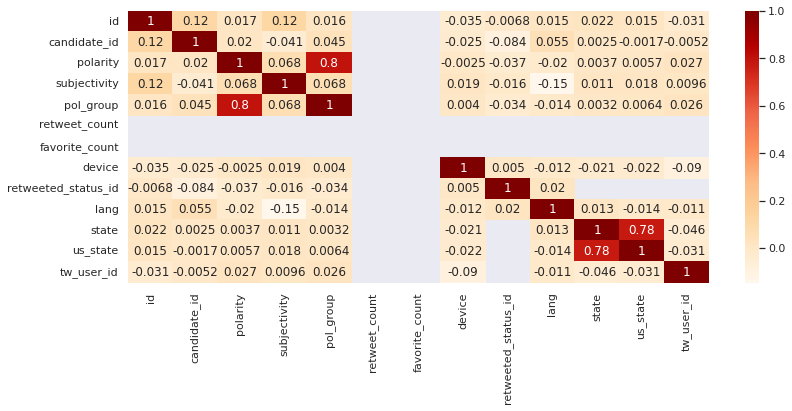

In [ ]:
plt.figure(figsize=(13,5))
cm = df.corr()
sns.heatmap(cm,cmap="OrRd",annot=True)

In [ ]:
#create dataset for each candidate
Clinton = df[df["candidate_id"] == 1]
Trump = df[df["candidate_id"] == 2]
Obama = df[df["candidate_id"] == 3]
Sanders = df[df["candidate_id"] == 4]

In [ ]:
#calculate average polarity for each candidate

In [ ]:
Clinton['polarity'].mean()

0.027119546417349726

In [ ]:
Trump['polarity'].mean()

0.04070252066378833

In [ ]:
Obama['polarity'].mean()

0.04472302375186993

In [ ]:
Sanders['polarity'].mean()

0.025819047619047613

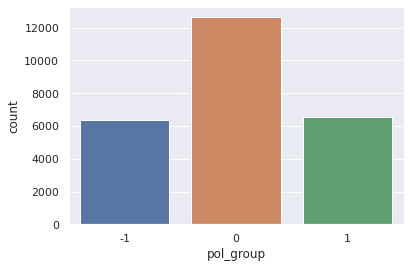

In [ ]:

sns.countplot(data = Clinton , x = 'pol_group')

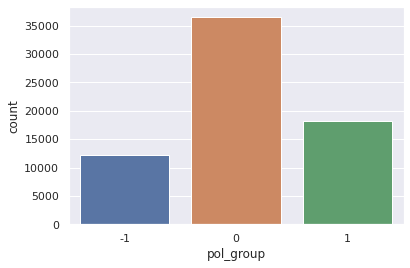

In [ ]:
sns.countplot(data = Trump , x = 'pol_group')

In [ ]:
#calculate average subjectivity for each candidate

In [ ]:
Clinton['subjectivity'].mean()

0.28328241007747507

In [ ]:
Trump['subjectivity'].mean()

0.2807023300911859

In [ ]:
Obama['subjectivity'].mean()

0.20272677286670165

In [ ]:
Sanders['subjectivity'].mean()

0.3226333333333333

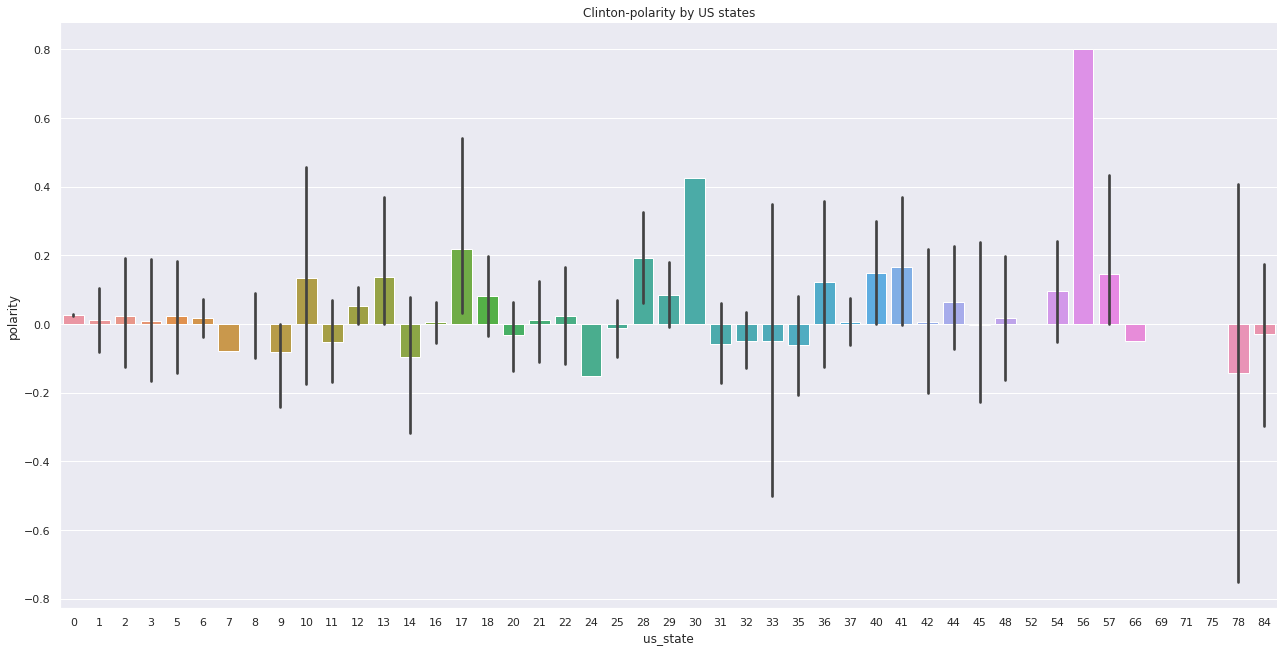

In [ ]:
#catplot clinton's polarity in each us state
clinton_pol = sns.catplot(x='us_state',y='polarity', data=Clinton, kind='bar', height=9, aspect=2)
clinton_pol.set(title = "Clinton-polarity by US states")

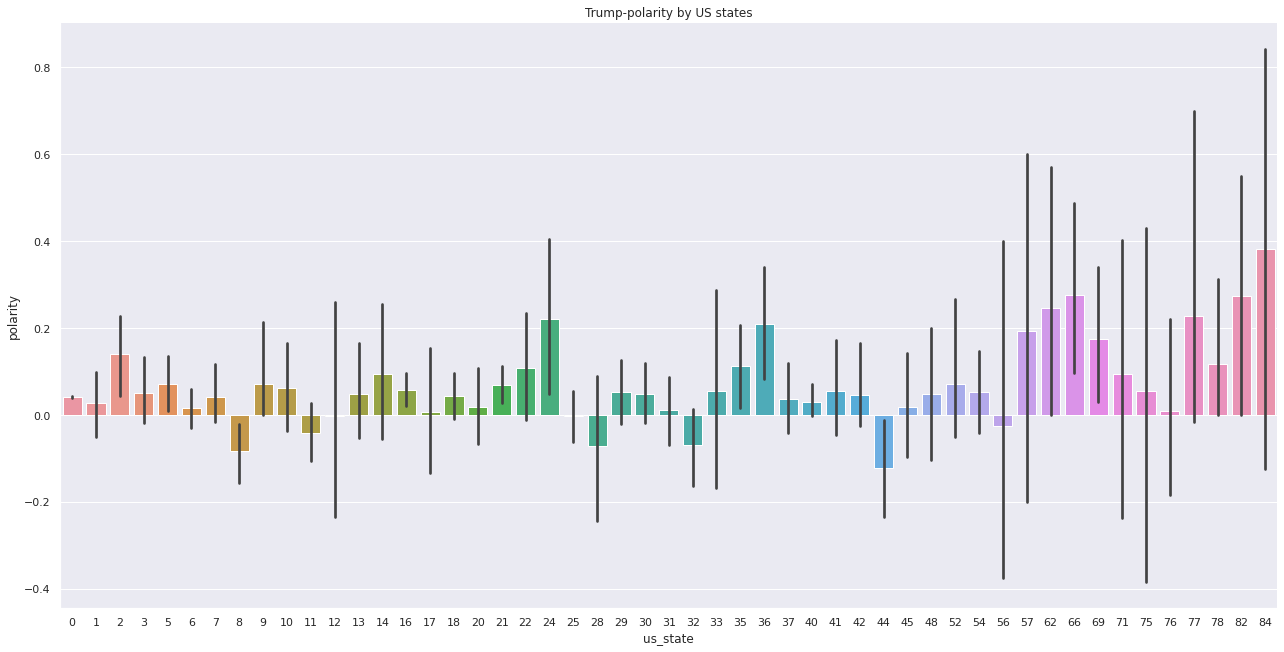

In [ ]:
#catplot clinton's polarity in each us state
trump_pol = sns.catplot(x='us_state',y='polarity', data=Trump, kind='bar', height=9, aspect=2)
trump_pol.set(title = "Trump-polarity by US states")

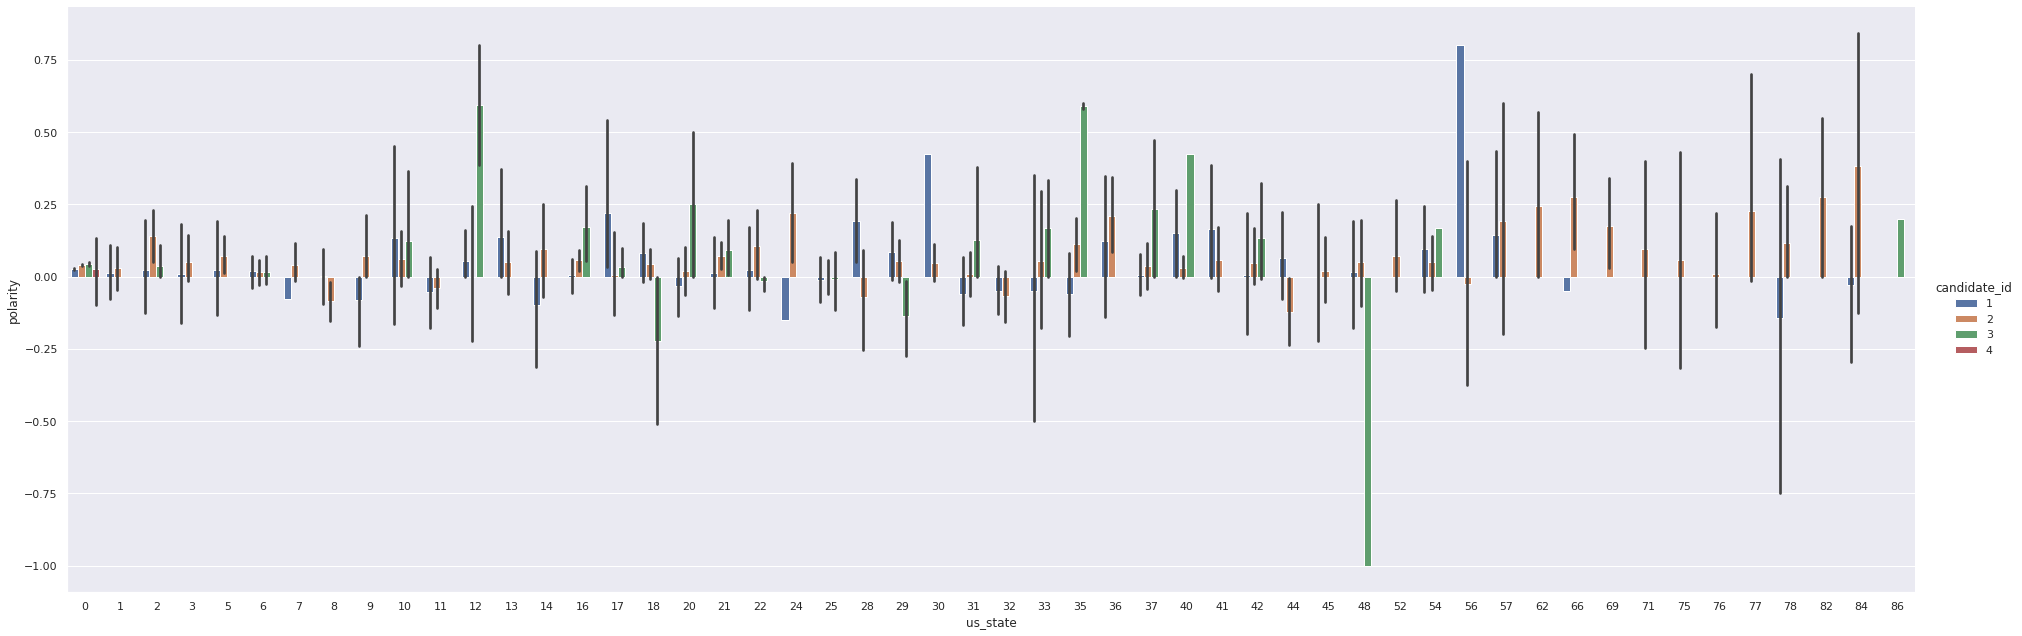

In [ ]:
#comparing polarity of each state with all 4 candidates
sns.catplot(x='us_state',y='polarity', data=df, kind='bar', hue='candidate_id', height=9, aspect=3)

In [ ]:
#count the number of us state values
df.us_state.value_counts()

0     97129
6       325
16      288
21      225
18      169
25      141
29      132
11      117
1        98
20       97
37       96
8        90
31       83
35       82
2        80
5        77
22       57
30       53
54       52
48       47
10       43
36       36
45       35
28       34
13       31
41       31
44       30
32       27
14       27
17       25
3        25
33       24
40       21
42       21
24       19
12       14
66       14
9        13
52       11
84       10
76       10
71        8
78        8
57        8
7         8
69        7
75        5
62        5
56        5
77        4
82        2
86        1
Name: us_state, dtype: int64

In [ ]:
#sentiment analysis
X = df[['candidate_id','subjectivity','device','us_state']]
y = df['pol_group']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state =26105111)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.62      0.22      0.32      1967
           0       0.97      0.95      0.96      5403
           1       0.59      0.90      0.71      2630

    accuracy                           0.79     10000
   macro avg       0.73      0.69      0.67     10000
weighted avg       0.80      0.79      0.77     10000



In [ ]:
X2 = df[['candidate_id','subjectivity','device','us_state']]
y2 = df['pol_group']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.10, random_state =26105111)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X_train)

scaled_x2_train = scaler2.transform(X2_train)
scaled_x2_test = scaler2.transform(X2_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(scaled_x2_train,y2_train)

LogisticRegression()

In [ ]:
predictions = model2.predict(scaled_x2_test)

In [ ]:
print(classification_report(y2_test,predictions))

              precision    recall  f1-score   support

          -1       0.43      0.06      0.10      1967
           0       0.88      0.95      0.92      5403
           1       0.55      0.82      0.66      2630

    accuracy                           0.74     10000
   macro avg       0.62      0.61      0.56     10000
weighted avg       0.71      0.74      0.69     10000



In [ ]:
X3 = df[['subjectivity','lang']]
y3 = df['pol_group']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size = 0.10, random_state =26105111)

In [ ]:
scaler3 = StandardScaler()
scaler3.fit(X3_train)

scaled_x3_train = scaler3.transform(X3_train)
scaled_x3_test = scaler3.transform(X3_test)

In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model3.fit(X3_train,y3_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y3_pred = model3.predict(X3_test)

In [ ]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

          -1       0.59      0.23      0.33      1967
           0       0.97      0.94      0.96      5403
           1       0.59      0.89      0.71      2630

    accuracy                           0.79     10000
   macro avg       0.72      0.69      0.67     10000
weighted avg       0.79      0.79      0.77     10000



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100000 non-null  int64  
 1   candidate_id         100000 non-null  int64  
 2   polarity             100000 non-null  float64
 3   subjectivity         100000 non-null  float64
 4   pol_group            100000 non-null  int64  
 5   retweet_count        100000 non-null  int64  
 6   favorite_count       100000 non-null  int64  
 7   device               100000 non-null  int64  
 8   retweeted_status_id  44607 non-null   float64
 9   lang                 100000 non-null  int64  
 10  state                100000 non-null  int64  
 11  tweet_text           55393 non-null   object 
 12  created_at           100000 non-null  object 
 13  us_state             100000 non-null  int64  
 14  inserted_at          100000 non-null  object 
 15  updated_at        